In [2]:
import pickle
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

FEATURE ENGINEERING

In [4]:
# dataset shape : number of records x number of features
print(df.shape)

(768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking correlation between features

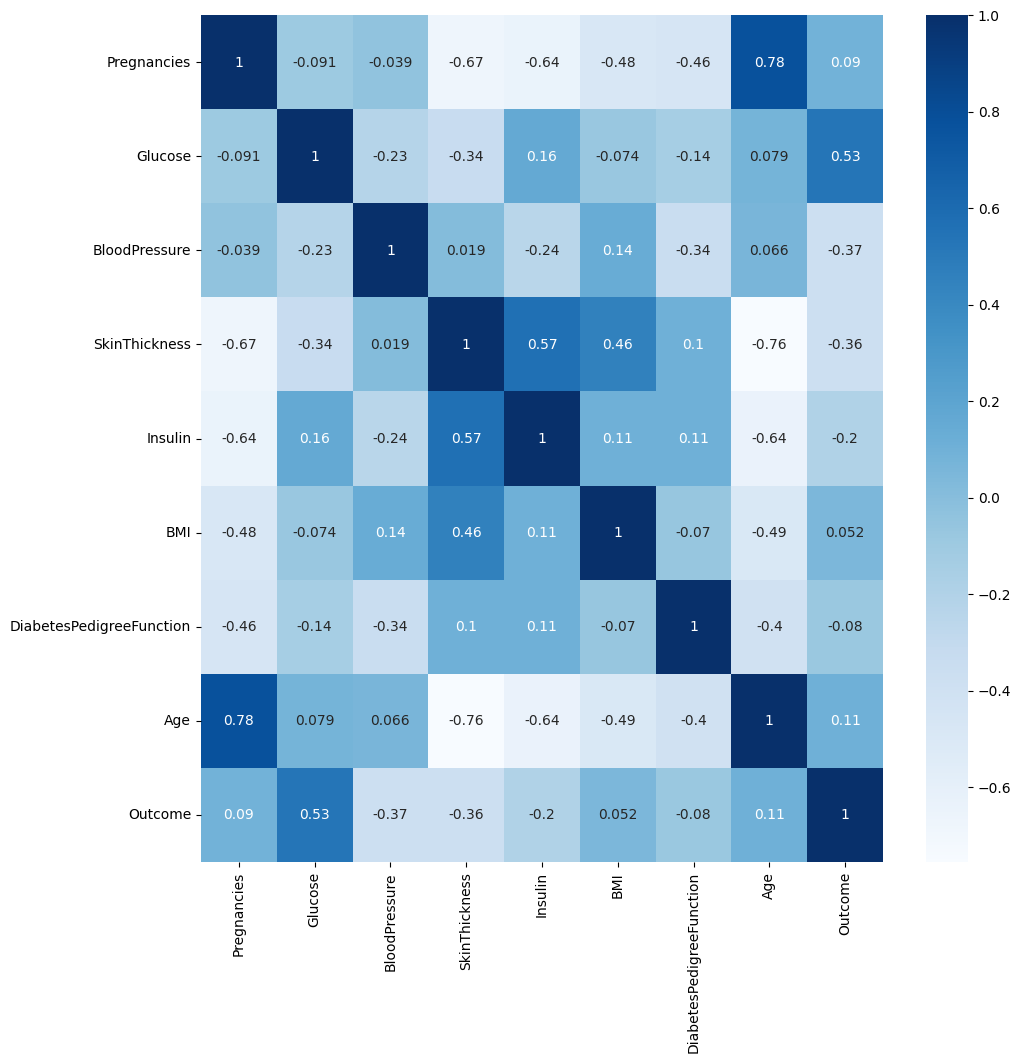

In [6]:
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(11, 11))
g = sns.heatmap(corr_mat[top_corr_features].corr(), annot=True, cmap="Blues")

In [7]:
# converting output label i.e. df[diabetes] from boolean to int.
df['Outcome'] = df['Outcome'].astype(int)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
diabetes_true_count = len(df.loc[df['Outcome'] == 1])
diabetes_false_count = len(df.loc[df['Outcome'] == 0])

print("Data having 1 as output: {}".format(diabetes_true_count))
print("Data having 0 as output: {}".format(diabetes_false_count))

Data having 1 as output: 268
Data having 0 as output: 500


### Train Test Split

In [9]:
all_features = ['Pregnancies', 
                 'Glucose', 
                 'BloodPressure', 
                 'SkinThickness', 
                 'Insulin',
                 'BMI', 
                 'DiabetesPedigreeFunction', 
                 'Age']

X = df[all_features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Checking values which are 0

In [10]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Glucose: {0}".format(len(df[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df[df['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(df[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(df[df['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df[df['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing age: 0
number of rows missing SkinThickness: 227


### Imputing these missing/zero values

In [11]:
missing_values_imputer = SimpleImputer(missing_values=0, strategy='mean')

X_train = missing_values_imputer.fit_transform(X_train)
X_test = missing_values_imputer.fit_transform(X_test)

In [12]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

### Training

In [13]:
# using random forest classifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

# random forest classifier accuracy
y_preds = rfc.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100}%")

Accuracy : 76.62337662337663%


### Random Forest Feature Importance

In [14]:
f_importance = pd.DataFrame(rfc.feature_importances_*100,index=all_features,columns=['Importance'])
f_importance.sort_values(by='Importance',ascending=False,inplace=True)
f_importance

Importance
Glucose                    25.689226
BMI                        17.126468
Age                        13.882952
DiabetesPedigreeFunction   11.887347
Insulin                     8.839787
BloodPressure               8.124373
Pregnancies                 7.289386
SkinThickness               7.160462

### Using XGBoost

In [15]:
clf = xgboost.XGBClassifier()
clf.fit(X_train, y_train)

# XGBoost classifier accuracy
y_preds = clf.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100}%")

Accuracy : 72.72727272727273%


### XGBoost Feature Importance

In [16]:
f_importance = pd.DataFrame(clf.feature_importances_*100,index=all_features,columns=['Importance'])
f_importance.sort_values(by='Importance',ascending=False,inplace=True)
f_importance

Importance
Glucose                    24.045095
Age                        14.121814
BMI                        14.022263
Insulin                    13.310452
SkinThickness               9.477400
Pregnancies                 8.737845
DiabetesPedigreeFunction    8.627424
BloodPressure               7.657705

In [17]:
# saving trained model
filename = '../models/diabetes.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [18]:
pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\zakza\appdata\local\programs\python\python39\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.
